In [2]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler as zscore # zscore
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso #LRlasso
from joblib import dump, load #to save models in files
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import json
from datetime import datetime
import os

## Find Good performing Predictors

In [2]:
with open("/home/t44p/PW_rawdata/results/newfeat_rfr/lcms/lcms_dict_nXcv.json", 'r') as json_file:
    lcms_prefix = json.load(json_file)
with open("/home/t44p/PW_rawdata/results/newfeat_rfr/gcms/gcms_dict_nXcv.json", 'r') as json_file:
    gcms_prefix = json.load(json_file)

In [3]:
gc = list(gcms_prefix.keys())
lc = list(lcms_prefix.keys())


In [4]:
print(lc)

['alpha_L_Fucose_1_Phosphate', 'Trehalose', 'Trehalose_phenolic_acid_', 'Maltotriose_', '_366_9939681_1_170199352', '_R_2_Phenylglycin', 'Oxidized_glutathione_', '_312_0943959_2_614228811', 'Guanosine_', 'gamma_Glutamylvaline_', '_512_1445532_3_132648409', 'Catechol_', '_303_0720727_3_335904942', 'Quinic_acid_derivative_3_56', '_374_1568694_3_674168475', 'Phaseoloidin', '_496_1502126_3_792994891', 'Vanilloloside', 'CGA_hexose_', 'Phenolic_glycoside_', 'gamma_Glutamylisoleucine_', 'L_gamma_glutamyl_L_isoleucine', '_658_1575839_4_528042834', 'Phenylalanylglutamic_acid_', '_5_Chlorogenic_acid', '_523_1663837_5_238225973', '_487_2029578_5_338775921', 'Quinic_acid_161_05_', 'Quinic_acid_derivative_with_he', 'Chlorogenic_acid_', 'Coumaroyl_quinic_acid_', '_351_1294837_5_809380415', 'Quercetin_glucose_glucose_rham', '_427_1824019_5_95992104', 'Quercetin_glc_glc_rha', '_567_2828405_6_133036019', 'Quercetin_3_7_di_glucoside_', '_441_1978503_6_218123415', '_4_O_p_Coumaroylquinic_acid_', 'Quercet

In [5]:
lasso_df = pd.read_csv("/home/t44p/PW_rawdata/results/newfeat_lasso/newfeat_lasso_performance.csv", sep="\t")
lasso_df = lasso_df[lasso_df['predictive_power'] == 'good'].copy()
lasso_good = list(lasso_df['target'])


In [6]:
rfr_df = pd.read_csv("/home/t44p/PW_rawdata/results/newfeat_rfr/newfeat_rfr_performance.csv", sep="\t")
rfr_df = rfr_df[rfr_df['predictive_power'] == 'good'].copy()
rfr_good = list(rfr_df['target'])


In [7]:
shared = set(rfr_good).intersection(set(lasso_good)) # shared by both, good predictors independent of approach
uniq_lasso = set(lasso_good).difference(set(rfr_good)) # uniq to lasso
uniq_rfr = set(rfr_good).difference(set(lasso_good)) # uniq to rfr

In [10]:
print(len(uniq_rfr))
print(len(uniq_lasso))
print(len(shared))


10
4
38


In [29]:
# Table 3. Good performing predictors shared by LASSO and Random Forest Regressor
for e in shared:
    # print(e)
    e = e.replace("_nXcv", "")
    if e in lc: 
        print(f"{e},LC-MS")
    elif e in gc:
        print(f"{e},GC-MS")

    


Isorhamnetin_3_O_glucoside_L,LC-MS
threonic_acid_292_220_rt7_49,GC-MS
Quercetin_glucose,LC-MS
p_coumaroyl_di_glucoside_L,LC-MS
pyroglutamic_acid_156_258_rt8_,GC-MS
Saponin_10_183,LC-MS
Quercetin_3_glucoside_3,LC-MS
alanine_116_218_rt3_38,GC-MS
Inosine_L,LC-MS
raffinose_437_451_rt16_91,GC-MS
CGA_hexose_,LC-MS
Kaempferol_3_O_rhamnoside_7_O_,LC-MS
_Rutin,LC-MS
erythronic_acid_292_rt7_24,GC-MS
glutamic_acid_246_363_rt8_31,GC-MS
Phenylalanylglutamic_acid_,LC-MS
Quercetin_7_4_O_diglucoside_,LC-MS
Maltotriose_,LC-MS
_312_0943959_2_614228811,LC-MS
Cellobiose_361_204_or_maltose_,GC-MS
Nicotinamide_adenine_dinucleot,LC-MS
Kaempferol_7_O_Glucoside_1_L,LC-MS
Quercitin_3_7_diglucoside_6_rh,LC-MS
glyceric_acid_292_189_rt5_63,GC-MS
aspartic_acid_232_218_rt7_48,GC-MS
Feruloyl_di_glucoside_L,LC-MS
Quercitin_3_O_Glucoside_2_L,LC-MS
naringenin_7_O_glucoside_1_L,LC-MS
_4_O_p_Coumaroylquinic_acid_,LC-MS
Caffeoylshikimic_acid_L,LC-MS
_1_O_Feruloyl_glucose_L,LC-MS
Phenylalanyaspartatic_acid_L,LC-MS
Oxidized_

In [33]:
# Table4: Good performing predictors uniq to lasso

for e in uniq_lasso:
    # print(e)
    e = e.replace("_nXcv", "")
    if e in lc: 
        print(f"{e},LC-MS")
    elif e in gc:
        print(f"{e},GC-MS")


Lactobionic_acid_L,LC-MS
glucose_1_phosphate_217_rt9_16,GC-MS
_658_1575839_4_528042834,LC-MS
L_gamma_glutamyl_L_isoleucine,LC-MS


In [31]:
# Table54: Good performing predictors uniq to rfr

for e in uniq_rfr:
    # print(e)
    e = e.replace("_nXcv", "")
    if e in lc: 
        print(f"{e},LC-MS")
    elif e in gc:
        print(f"{e},GC-MS")


Fructose_1_6_biosphasphate_L,LC-MS
_487_2029578_5_338775921,LC-MS
Cellobiose_361_204_rt14_40,GC-MS
_6_phospho_gluconate,GC-MS
_641_171822_6_885700966,LC-MS
Isorhamnetin_3_O_rutinoside,LC-MS
Kaempferol_glucose_xylose_L,LC-MS
Conduritol_B_Epoxide_L,LC-MS
Caffeic_acid_glucoside_L,LC-MS
Quinic_acid_161_05_,LC-MS


------

## Lasso Plot performances GC vs. LC-MS

In [3]:

path_gc = "/home/t44p/PW_rawdata/results/newfeat/newfeat_lasso/gcms/"
path_lc ="/home/t44p/PW_rawdata/results/newfeat/newfeat_lasso/lcms/"
lasso_gcms = {}
lasso_lcms = {}

# Iterate over each file in the directory
for p in [path_gc, path_lc]:

    for file in os.listdir(p):
        if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
            file_path = os.path.join(p, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            # Extract mean scores and fold scores
            #print(file)
            all_means = data['mean_scores']
            all_fold_scores = []
            for item, values in data['scores'].items():
                all_fold_scores.extend(values['fold_scores'])

            if p == path_gc:
                # Use file name without extension as the key
                file_name = os.path.splitext(file)[0]
                lasso_gcms[file_name] = {
                    'all_mean_scores': all_means,
                    'mean_10x': np.mean(all_means),
                    'all_fold_scores': all_fold_scores
                }
            if p == path_lc:
                # Use file name without extension as the key
                file_name = os.path.splitext(file)[0]
                lasso_lcms[file_name] = {
                    'all_mean_scores': all_means,
                    'mean_10x': np.mean(all_means),
                    'all_fold_scores': all_fold_scores
                }


### variances gt 2

In [4]:
lasso_gcms_variances = []
lasso_gcms_variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_gcms.values()]

lasso_lcms_variances = []
lasso_lcms_variances = [np.var(target_data['all_fold_scores']) for target_data in lasso_lcms.values()]


In [5]:
c = 0
print(f"max variance gcms {max(lasso_gcms_variances)}")
print(f"target\t score variance across 10 runs\t min score\tmax score")
for item, target_data in lasso_gcms.items():
    np.var(target_data['all_fold_scores'])
    if np.var(target_data['all_fold_scores']) > 2:
        print(f"{item}\t{np.var(target_data['all_fold_scores'])}\t{min(target_data['all_fold_scores'])}\t{max(target_data['all_fold_scores'])} ")# {max(target_data['all_fold_scores'])}
        c += 1
print(c)

max variance gcms 0.40623194320962797
target	 score variance across 10 runs	 min score	max score
0


In [6]:
c = 0
print(f"max variance lcms {max(lasso_lcms_variances)}")
print(f"target\t score variance across 10 runs\t min score\tmax score")
for item, target_data in lasso_lcms.items():
    np.var(target_data['all_fold_scores'])
    if np.var(target_data['all_fold_scores']) > 2:
        print(f"{item}\t{np.var(target_data['all_fold_scores'])}\t{min(target_data['all_fold_scores'])}\t{max(target_data['all_fold_scores'])} ")# {max(target_data['all_fold_scores'])}
        c += 1
print(c)

max variance lcms 63.53500352148913
target	 score variance across 10 runs	 min score	max score
_D_Glycero_alpha_D_Manno_Hepto_nXcv	6.073305620124308	-14.47897098191607	0.2015549263938754 
Triterpene_8_14_nXcv	63.53500352148913	-46.66783965912978	-0.00010702172278453936 
2


bins [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ], average bin size 0.05


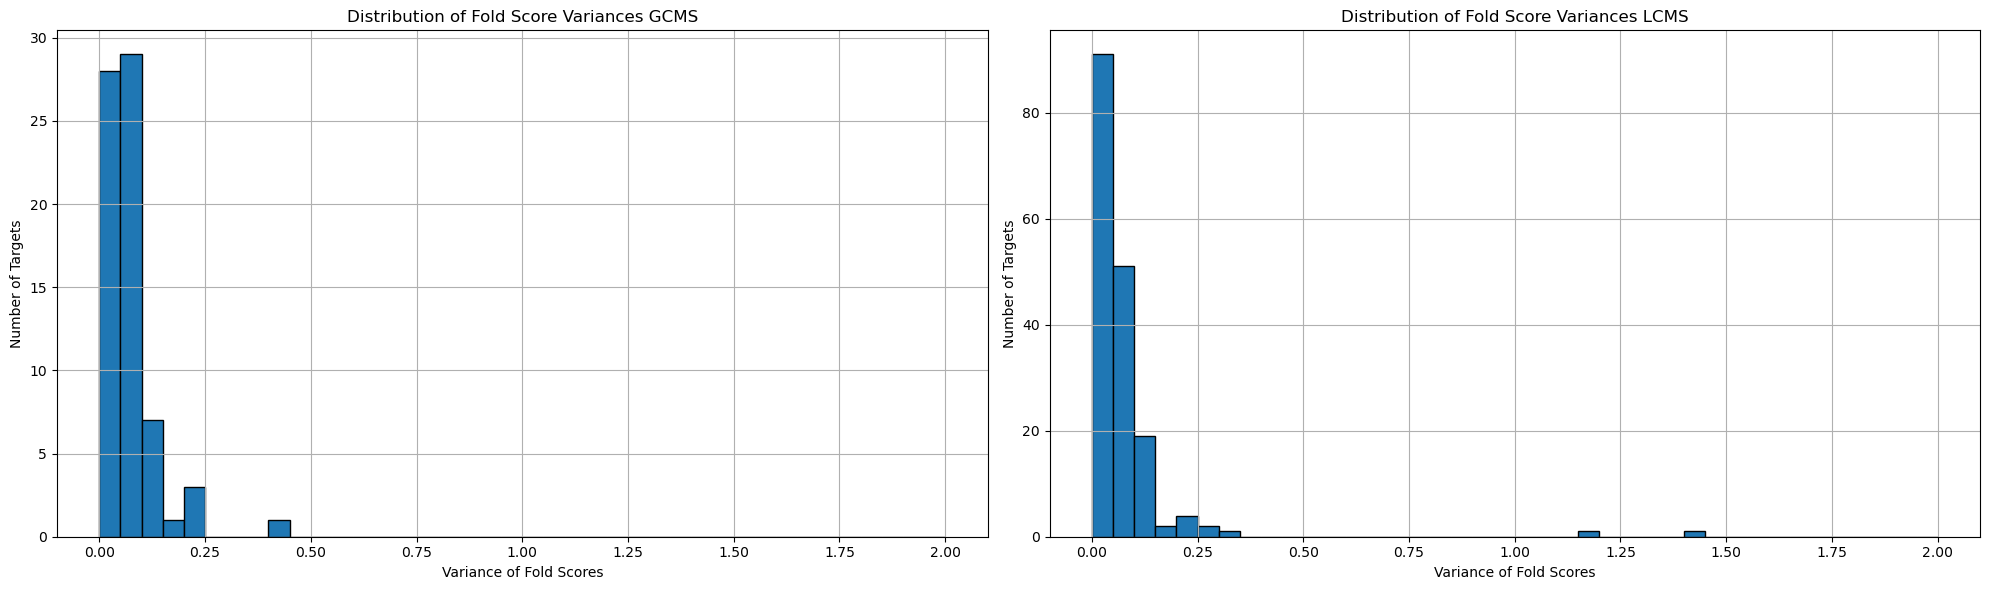

In [7]:

# Define the bins for histogram
bins = np.arange(0, 2.05, 0.05)
bin_sizes = np.diff(bins)
print(f"bins {bins}, average bin size {np.mean(bin_sizes)}")

# Set up the figure for grid plot
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for GCMS variances
axs[0].hist(lasso_gcms_variances, bins=bins, edgecolor='black')
axs[0].set_title('Distribution of Fold Score Variances GCMS')
axs[0].set_xlabel('Variance of Fold Scores')
axs[0].set_ylabel('Number of Targets')
axs[0].grid(True)

# Plot for LCMS variances
axs[1].hist(lasso_lcms_variances, bins=bins, edgecolor='black')
axs[1].set_title('Distribution of Fold Score Variances LCMS')
axs[1].set_xlabel('Variance of Fold Scores')
axs[1].set_ylabel('Number of Targets')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### R² lt -1

In [8]:
all_mean_scores_gcms = [lasso_gcms[target_data]['mean_10x'] for target_data in lasso_gcms if lasso_gcms[target_data]['mean_10x'] > -1]
all_mean_scores_lcms = [lasso_lcms[target_data]['mean_10x'] for target_data in lasso_lcms if lasso_lcms[target_data]['mean_10x'] > -1]


In [9]:
c = 0
for target_data in lasso_gcms:
    if lasso_gcms[target_data]['mean_10x'] <= -1:
        print(f"{target_data} with mean score\t{round(lasso_gcms[target_data]['mean_10x'], 3)}")
        c += 1
print(f"excluded {c} gcms models with R² lt -1")


excluded 0 gcms models with R² lt -1


In [10]:

c = 0
for target_data in lasso_lcms:
    if lasso_lcms[target_data]['mean_10x'] <= -1:
        print(f"{target_data} with mean score\t{round(lasso_lcms[target_data]['mean_10x'], 3)}")
        c += 1
print(f"excluded {c} lcms models with R² lt -1")


Triterpene_8_14_nXcv with mean score	-1.651
excluded 1 lcms models with R² lt -1


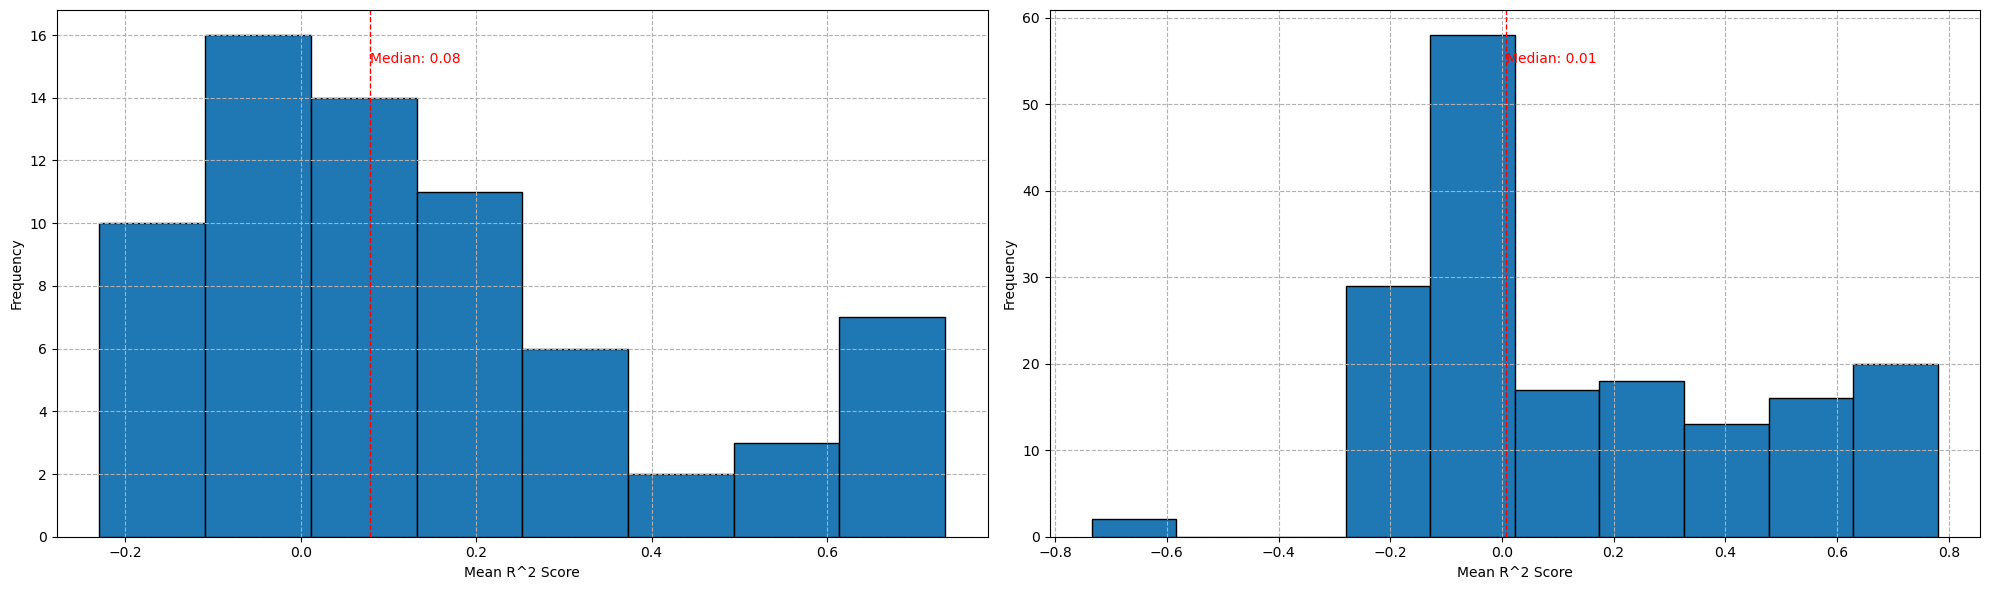

In [11]:

# Set up the figure for grid plot
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# GCMS Plot
bin_edges_gcms = np.histogram_bin_edges(all_mean_scores_gcms, bins='auto')
axs[0].hist(all_mean_scores_gcms, bins=bin_edges_gcms, edgecolor='black')
axs[0].set_xlabel('Mean R^2 Score')
axs[0].set_ylabel('Frequency')
axs[0].grid(True, which="both", ls="--")
median_score_gcms = np.median(all_mean_scores_gcms)
axs[0].axvline(median_score_gcms, color='red', linestyle='dashed', linewidth=1)
axs[0].text(median_score_gcms, axs[0].get_ylim()[1]*0.9, f'Median: {median_score_gcms:.2f}', color = 'red')

# LCMS Plot
bin_edges_lcms = np.histogram_bin_edges(all_mean_scores_lcms, bins='auto')
axs[1].hist(all_mean_scores_lcms, bins=bin_edges_lcms, edgecolor='black')
axs[1].set_xlabel('Mean R^2 Score')
axs[1].set_ylabel('Frequency')
axs[1].grid(True, which="both", ls="--")
median_score_lcms = np.median(all_mean_scores_lcms)
axs[1].axvline(median_score_lcms, color='red', linestyle='dashed', linewidth=1)
axs[1].text(median_score_lcms, axs[1].get_ylim()[1]*0.9, f'Median: {median_score_lcms:.2f}', color = 'red')

plt.tight_layout()
plt.show()

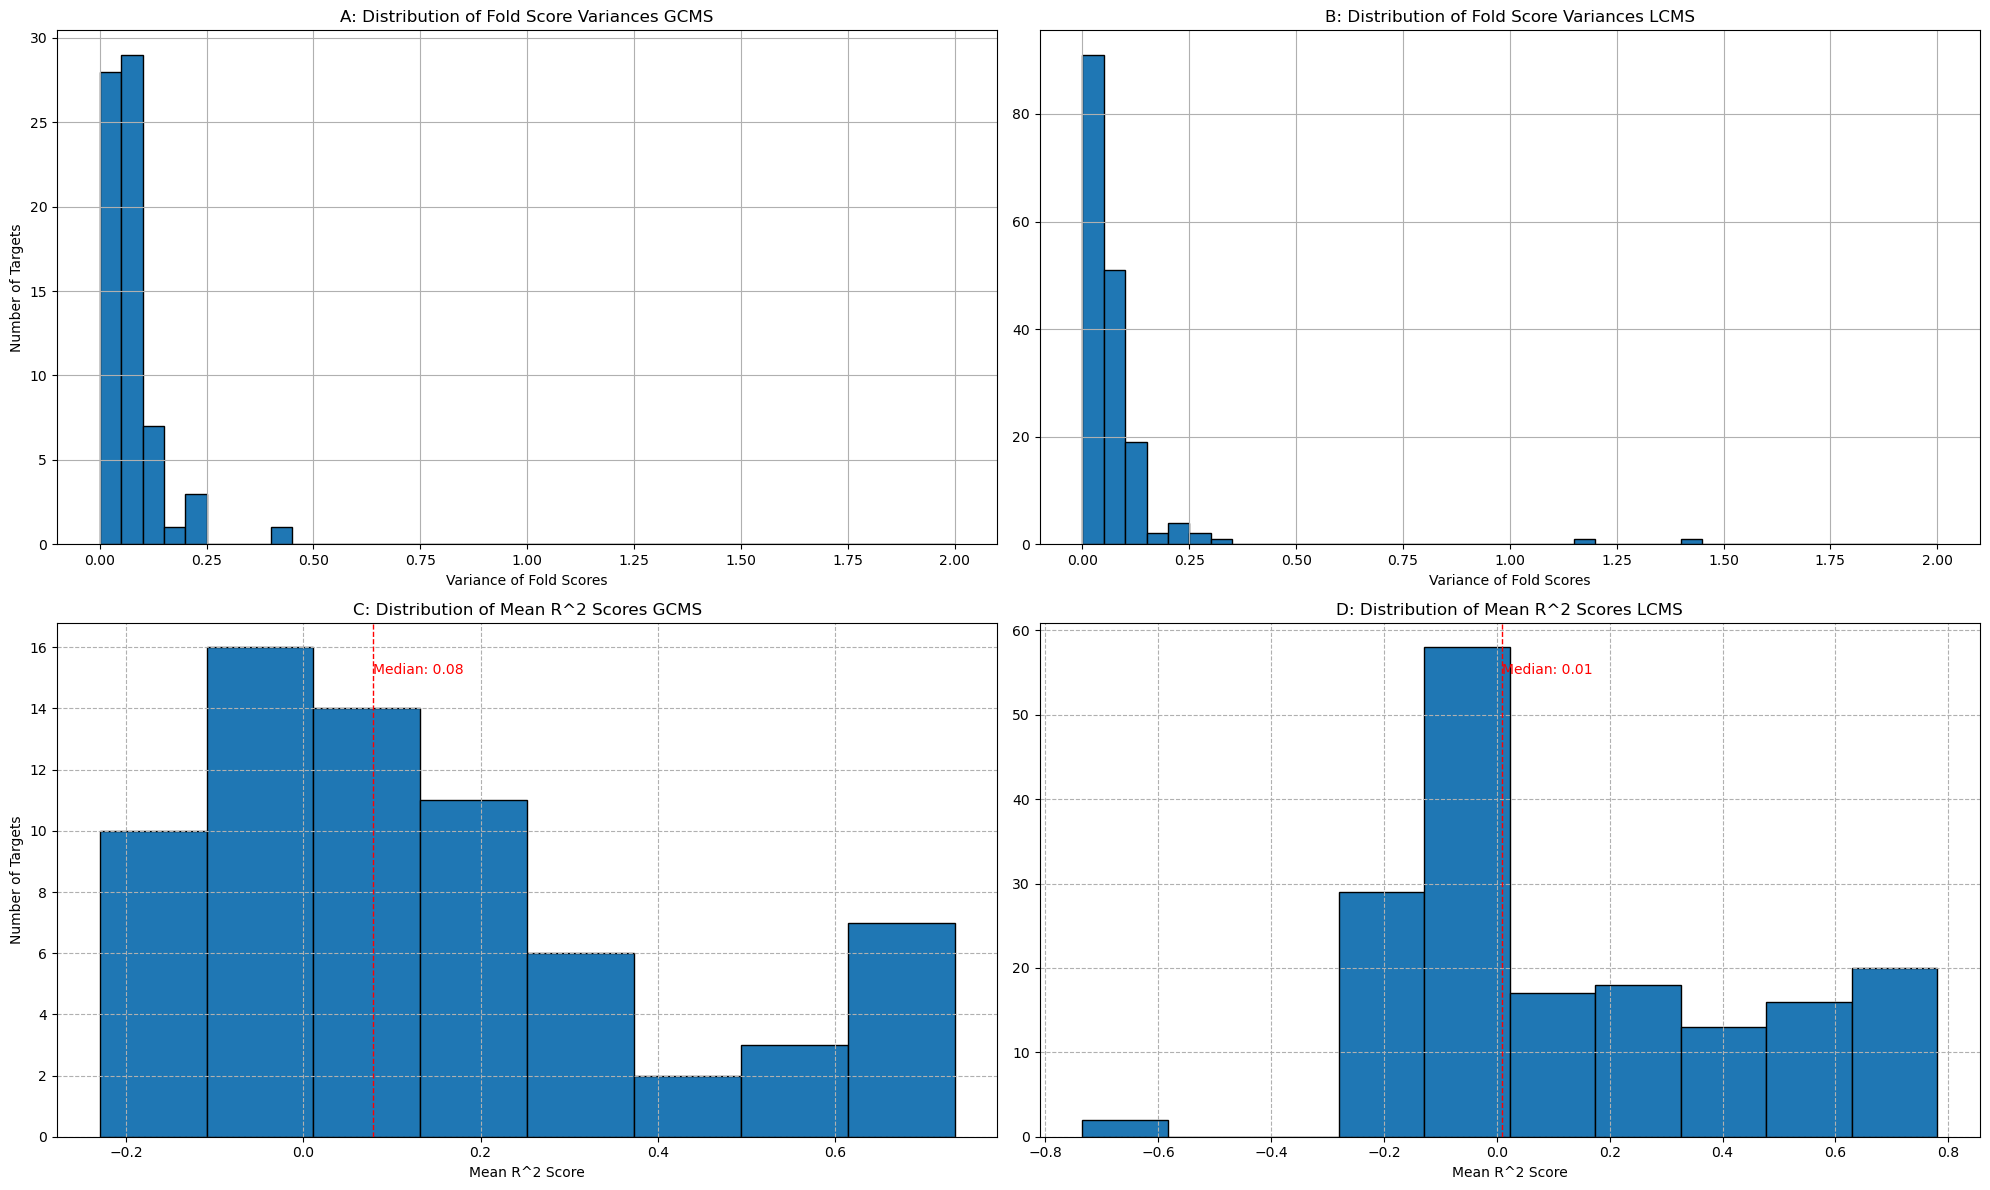

In [12]:
# Assuming all required data and variables are already defined and initialized as per previous code blocks.

# Set up the figure for the combined grid plot
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 2 rows, 2 columns

# Plot A: Distribution of Fold Score Variances GCMS
axs[0, 0].hist(lasso_gcms_variances, bins=bins, edgecolor='black')
axs[0, 0].set_title('A: Distribution of Fold Score Variances GCMS')
axs[0, 0].set_xlabel('Variance of Fold Scores')
axs[0, 0].set_ylabel('Number of Targets')
axs[0, 0].grid(True)

# Plot B: Distribution of Fold Score Variances LCMS
axs[0, 1].hist(lasso_lcms_variances, bins=bins, edgecolor='black')
axs[0, 1].set_title('B: Distribution of Fold Score Variances LCMS')
axs[0, 1].set_xlabel('Variance of Fold Scores')
#axs[0, 1].set_ylabel('Number of Targets')
axs[0, 1].grid(True)

# Plot C: Distribution of Mean R^2 Scores GCMS
axs[1, 0].hist(all_mean_scores_gcms, bins=bin_edges_gcms, edgecolor='black')
axs[1, 0].set_xlabel('Mean R^2 Score')
axs[1, 0].set_ylabel('Number of Targets')
axs[1, 0].grid(True, which="both", ls="--")
axs[1, 0].axvline(median_score_gcms, color='red', linestyle='dashed', linewidth=1)
axs[1, 0].text(median_score_gcms, axs[1, 0].get_ylim()[1]*0.9, f'Median: {median_score_gcms:.2f}', color = 'red')
axs[1, 0].set_title('C: Distribution of Mean R^2 Scores GCMS')

# Plot D: Distribution of Mean R^2 Scores LCMS
axs[1, 1].hist(all_mean_scores_lcms, bins=bin_edges_lcms, edgecolor='black')
axs[1, 1].set_xlabel('Mean R^2 Score')
#axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True, which="both", ls="--")
axs[1, 1].axvline(median_score_lcms, color='red', linestyle='dashed', linewidth=1)
axs[1, 1].text(median_score_lcms, axs[1, 1].get_ylim()[1]*0.9, f'Median: {median_score_lcms:.2f}', color = 'red')
axs[1, 1].set_title('D: Distribution of Mean R^2 Scores LCMS')

plt.tight_layout()
plt.show()


## RF-R Plot performances GC vs. LC-MS

In [21]:

path_gc = "/home/t44p/PW_rawdata/results/newfeat/newfeat_rfr/gcms/"
path_lc ="/home/t44p/PW_rawdata/results/newfeat/newfeat_rfr/lcms/"
rfr_gcms = {}
rfr_lcms = {}

# Iterate over each file in the directory
for p in [path_gc, path_lc]:

    for file in os.listdir(p):
        if file.endswith(".json") and not(file.startswith('gcms_dict_nXcv') or file.startswith('lcms_dict_nXcv')):
            file_path = os.path.join(p, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
            
            # Extract mean scores and fold scores
            #print(file)
            all_means = data['mean_scores']
            all_fold_scores = []
            for item, values in data['scores'].items():
                all_fold_scores.extend(values['fold_scores'])

            if p == path_gc:
                # Use file name without extension as the key
                file_name = os.path.splitext(file)[0]
                rfr_gcms[file_name] = {
                    'all_mean_scores': all_means,
                    'mean_10x': np.mean(all_means),
                    'all_fold_scores': all_fold_scores
                }
            if p == path_lc:
                # Use file name without extension as the key
                file_name = os.path.splitext(file)[0]
                rfr_lcms[file_name] = {
                    'all_mean_scores': all_means,
                    'mean_10x': np.mean(all_means),
                    'all_fold_scores': all_fold_scores
                }


### variances gt 2

In [22]:
rfr_gcms_variances = []
rfr_gcms_variances = [np.var(target_data['all_fold_scores']) for target_data in rfr_gcms.values()]

rfr_lcms_variances = []
rfr_lcms_variances = [np.var(target_data['all_fold_scores']) for target_data in rfr_lcms.values()]


c = 0
print(f"max variance gcms {max(rfr_gcms_variances)}")
print(f"target\t score variance across 10 runs\t min score\tmax score")
for item, target_data in rfr_gcms.items():
    np.var(target_data['all_fold_scores'])
    if np.var(target_data['all_fold_scores']) > 2:
        print(f"{item}\t{np.var(target_data['all_fold_scores'])}\t{min(target_data['all_fold_scores'])}\t{max(target_data['all_fold_scores'])} ")# {max(target_data['all_fold_scores'])}
        c += 1
print(c)



max variance gcms 0.8812408210994249
target	 score variance across 10 runs	 min score	max score
0


In [23]:
c = 0
print(f"max variance lcms {max(rfr_lcms_variances)}")
print(f"target\t score variance across 10 runs\t min score\tmax score")
for item, target_data in rfr_lcms.items():
    np.var(target_data['all_fold_scores'])
    if np.var(target_data['all_fold_scores']) > 2:
        print(f"{item}\t{np.var(target_data['all_fold_scores'])}\t{min(target_data['all_fold_scores'])}\t{max(target_data['all_fold_scores'])} ")# {max(target_data['all_fold_scores'])}
        c += 1
print(c)


max variance lcms 96.26583578128012
target	 score variance across 10 runs	 min score	max score
Dehydro_Ascorbic_acid_L_nXcv	3.329306157698497	-5.890785389865212	-0.05049764868275086 
_D_Glycero_alpha_D_Manno_Hepto_nXcv	3.0330107023987636	-10.205282235286651	0.17263555093521077 
Triterpene_8_14_nXcv	96.26583578128012	-57.52374975704539	0.13599824118107962 
3


bins [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ], average bin size 0.05


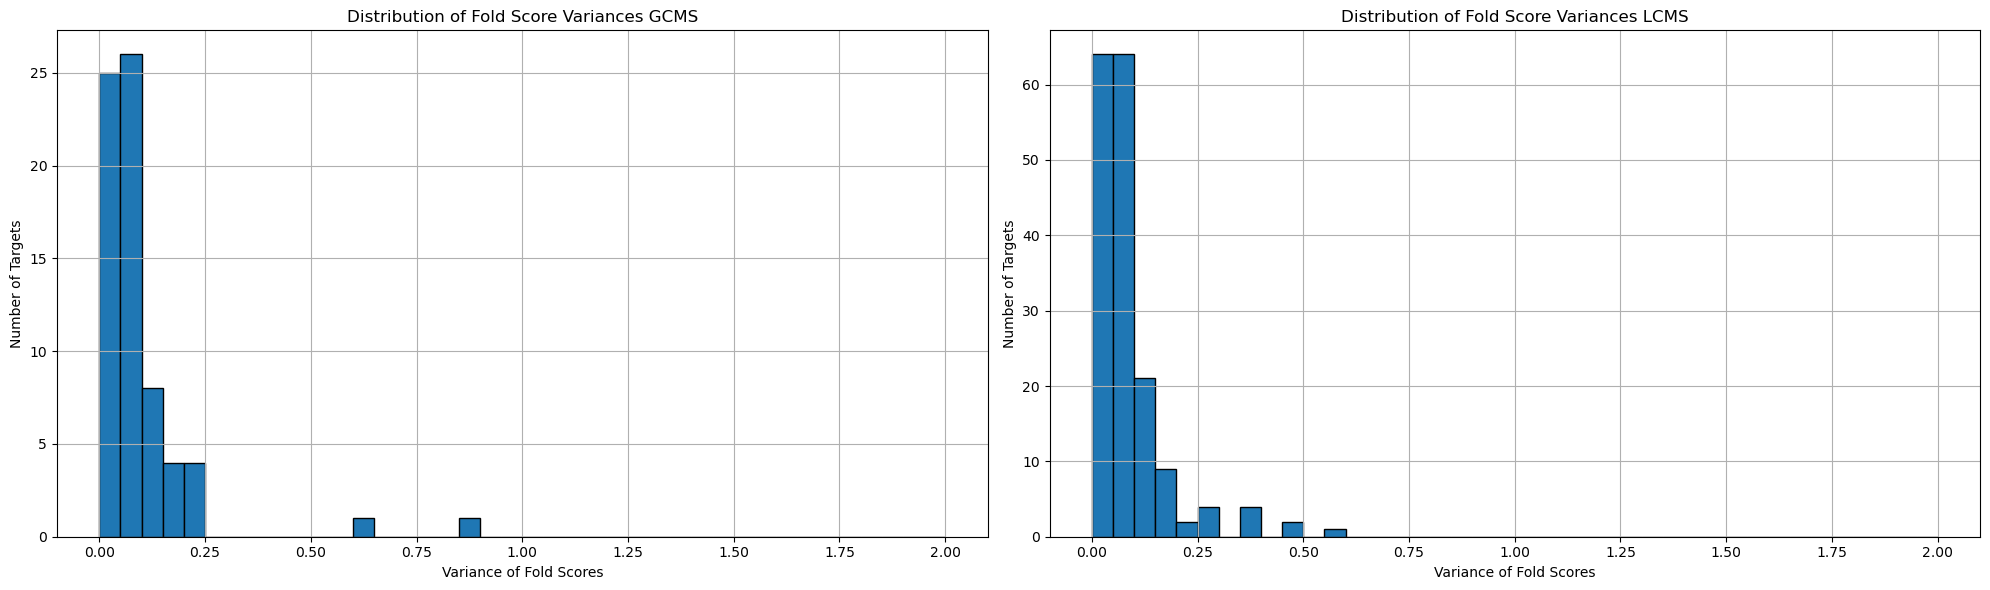

In [24]:

# Define the bins for histogram
bins = np.arange(0, 2.05, 0.05)
bin_sizes = np.diff(bins)
print(f"bins {bins}, average bin size {np.mean(bin_sizes)}")

# Set up the figure for grid plot
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for GCMS variances
axs[0].hist(rfr_gcms_variances, bins=bins, edgecolor='black')
axs[0].set_title('Distribution of Fold Score Variances GCMS')
axs[0].set_xlabel('Variance of Fold Scores')
axs[0].set_ylabel('Number of Targets')
axs[0].grid(True)

# Plot for LCMS variances
axs[1].hist(rfr_lcms_variances, bins=bins, edgecolor='black')
axs[1].set_title('Distribution of Fold Score Variances LCMS')
axs[1].set_xlabel('Variance of Fold Scores')
axs[1].set_ylabel('Number of Targets')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### R² lt -1

In [25]:
all_mean_scores_gcms = [rfr_gcms[target_data]['mean_10x'] for target_data in rfr_gcms if rfr_gcms[target_data]['mean_10x'] > -1]
all_mean_scores_lcms = [rfr_lcms[target_data]['mean_10x'] for target_data in rfr_lcms if rfr_lcms[target_data]['mean_10x'] > -1]


In [26]:
c = 0
for target_data in rfr_gcms:
    if rfr_gcms[target_data]['mean_10x'] <= -1:
        print(f"{target_data} with mean score\t{round(rfr_gcms[target_data]['mean_10x'], 3)}")
        c += 1
print(f"excluded {c} gcms models with R² lt -1")



excluded 0 gcms models with R² lt -1


In [27]:

c = 0
for target_data in rfr_lcms:
    if rfr_lcms[target_data]['mean_10x'] <= -1:
        print(f"{target_data} with mean score\t{round(rfr_lcms[target_data]['mean_10x'], 3)}")
        c += 1
print(f"excluded {c} lcms models with R² lt -1")


Dehydro_Ascorbic_acid_L_nXcv with mean score	-1.513
Argininosuccinic_acid_L_nXcv with mean score	-3.0
Triterpene_8_14_nXcv with mean score	-2.065
excluded 3 lcms models with R² lt -1


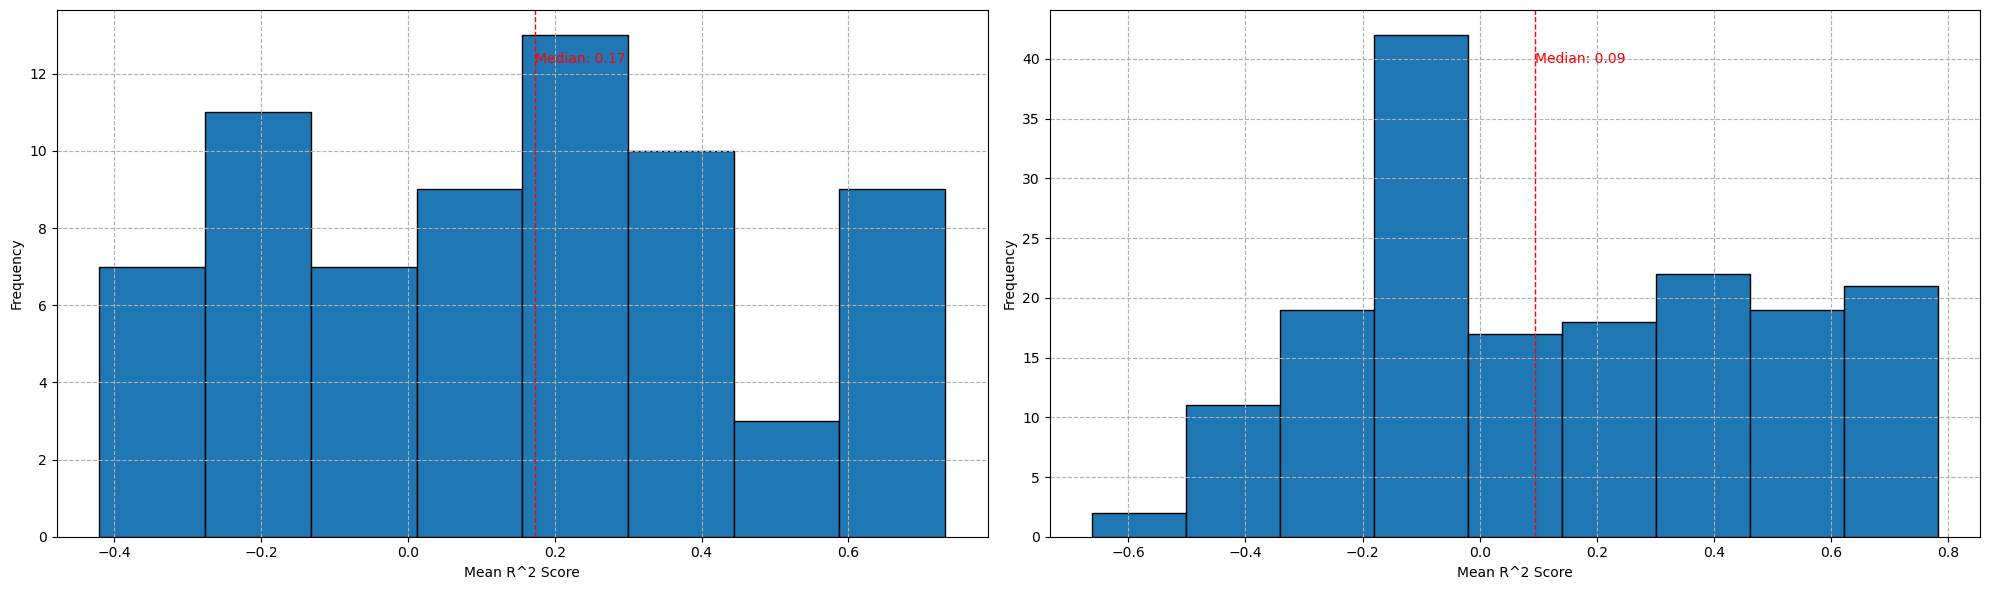

In [28]:
# Set up the figure for grid plot
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# GCMS Plot
bin_edges_gcms = np.histogram_bin_edges(all_mean_scores_gcms, bins='auto')
axs[0].hist(all_mean_scores_gcms, bins=bin_edges_gcms, edgecolor='black')
axs[0].set_xlabel('Mean R^2 Score')
axs[0].set_ylabel('Frequency')
axs[0].grid(True, which="both", ls="--")
median_score_gcms = np.median(all_mean_scores_gcms)
axs[0].axvline(median_score_gcms, color='red', linestyle='dashed', linewidth=1)
axs[0].text(median_score_gcms, axs[0].get_ylim()[1]*0.9, f'Median: {median_score_gcms:.2f}', color = 'red')

# LCMS Plot
bin_edges_lcms = np.histogram_bin_edges(all_mean_scores_lcms, bins='auto')
axs[1].hist(all_mean_scores_lcms, bins=bin_edges_lcms, edgecolor='black')
axs[1].set_xlabel('Mean R^2 Score')
axs[1].set_ylabel('Frequency')
axs[1].grid(True, which="both", ls="--")
median_score_lcms = np.median(all_mean_scores_lcms)
axs[1].axvline(median_score_lcms, color='red', linestyle='dashed', linewidth=1)
axs[1].text(median_score_lcms, axs[1].get_ylim()[1]*0.9, f'Median: {median_score_lcms:.2f}', color = 'red')

plt.tight_layout()
plt.show()

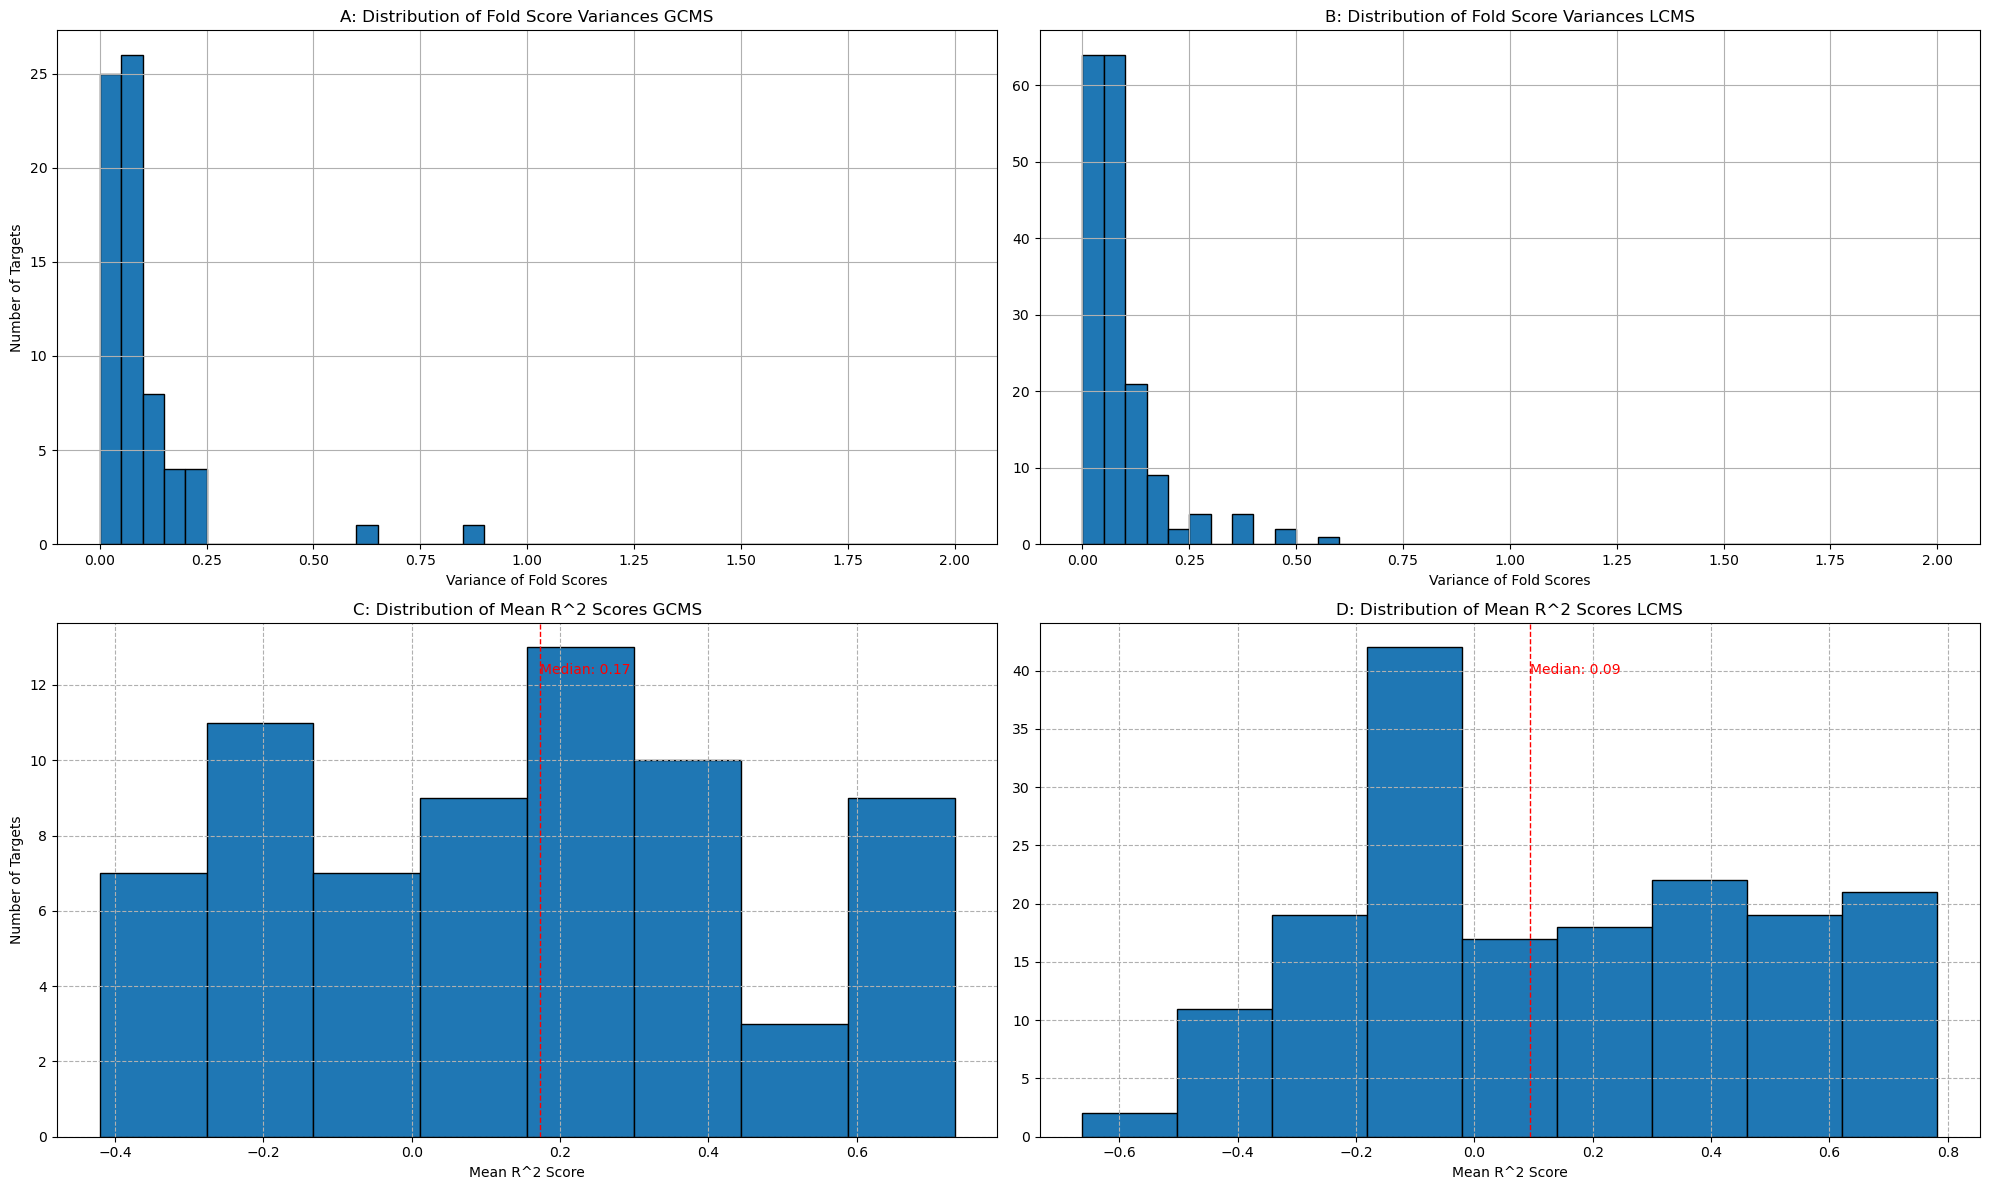

In [29]:
# Assuming all required data and variables are already defined and initialized as per previous code blocks.

# Set up the figure for the combined grid plot
fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # 2 rows, 2 columns

# Plot A: Distribution of Fold Score Variances GCMS
axs[0, 0].hist(rfr_gcms_variances, bins=bins, edgecolor='black')
axs[0, 0].set_title('A: Distribution of Fold Score Variances GCMS')
axs[0, 0].set_xlabel('Variance of Fold Scores')
axs[0, 0].set_ylabel('Number of Targets')
axs[0, 0].grid(True)

# Plot B: Distribution of Fold Score Variances LCMS
axs[0, 1].hist(rfr_lcms_variances, bins=bins, edgecolor='black')
axs[0, 1].set_title('B: Distribution of Fold Score Variances LCMS')
axs[0, 1].set_xlabel('Variance of Fold Scores')
#axs[0, 1].set_ylabel('Number of Targets')
axs[0, 1].grid(True)

# Plot C: Distribution of Mean R^2 Scores GCMS
axs[1, 0].hist(all_mean_scores_gcms, bins=bin_edges_gcms, edgecolor='black')
axs[1, 0].set_xlabel('Mean R^2 Score')
axs[1, 0].set_ylabel('Number of Targets')
axs[1, 0].grid(True, which="both", ls="--")
axs[1, 0].axvline(median_score_gcms, color='red', linestyle='dashed', linewidth=1)
axs[1, 0].text(median_score_gcms, axs[1, 0].get_ylim()[1]*0.9, f'Median: {median_score_gcms:.2f}', color = 'red')
axs[1, 0].set_title('C: Distribution of Mean R^2 Scores GCMS')

# Plot D: Distribution of Mean R^2 Scores LCMS
axs[1, 1].hist(all_mean_scores_lcms, bins=bin_edges_lcms, edgecolor='black')
axs[1, 1].set_xlabel('Mean R^2 Score')
#axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True, which="both", ls="--")
axs[1, 1].axvline(median_score_lcms, color='red', linestyle='dashed', linewidth=1)
axs[1, 1].text(median_score_lcms, axs[1, 1].get_ylim()[1]*0.9, f'Median: {median_score_lcms:.2f}', color = 'red')
axs[1, 1].set_title('D: Distribution of Mean R^2 Scores LCMS')

plt.tight_layout()
plt.show()
